# INTRODUCTION

Let's try to solve the XOR problem. The following codes were based on the ideas from Ian Goodfellow et al. _Deep Learning_ book.

## Imports and Dataset 

In [115]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
print('X = \n',X)
print('y = \n ',y)

X = 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y = 
  [[0]
 [1]
 [1]
 [0]]


## Some Plot Stuff 

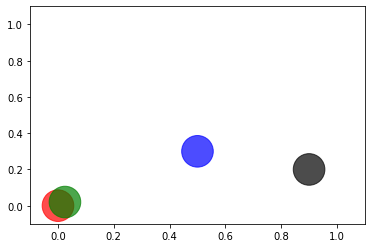

In [117]:
#s is the points size
#alpha is how transparent the objects are (as alpha -> 1, the points look more "solid")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1]) 
plt.scatter([0,0.025,0.9,0.5],[0,0.02,0.2,0.3],color = ['red','green','black','blue'],s = [1000,1000,1000,1000],alpha=0.7)

In [118]:
def my_plot(first_axis,second_axis,x_lim,y_lim,my_title,x_axis_lbl,y_axis_lbl,line_flag = False,line_m=1,line_b=0,size=10**3,alpha = 0.7):
  plt.xlim(x_lim)
  plt.ylim(y_lim)
  plt.title(my_title)
  plt.xlabel(x_axis_lbl)
  plt.ylabel(y_axis_lbl)
  plt.scatter(first_axis,second_axis,color=['red','green','black','blue'], s = [size,size,size,size],alpha=alpha)
  if(line_flag):
    x_basis = np.linspace(x_lim[0],x_lim[1],1000)
    plt.plot(x_basis,line_m*x_basis+line_b,linestyle='-')
  plt.grid()
  plt.show()

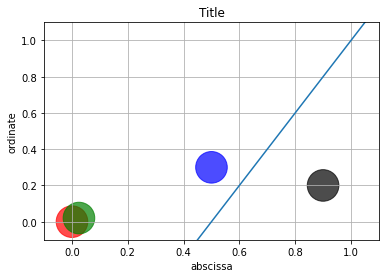

In [119]:
my_plot([0,0.025,0.9,0.5],[0,0.02,0.2,0.3],[-0.1,1.1],[-0.1,1.1],"Title","abscissa","ordinate",line_flag=True,line_m=2,line_b=-1)

## Using function composition
This was based on functions that can be found here: https://www.tensorflow.org/api_docs/python/tf/linalg


In [120]:
# Let's set plot limits
my_x_lim = [-3,3]
my_y_lim = [-3,3]

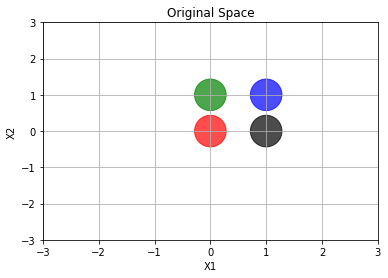

In [121]:
# Plot examples

my_plot(X[:,0],X[:,1],my_x_lim,my_y_lim,"Original Space", "X1","X2")

In [122]:
# Weight matrix (from input dimension to hidden layer representation)
W = tf.constant([1,1,1,1],shape=[2,2])
W

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [123]:
# bias vector in hidden layer representation
c = tf.constant([0,-1],shape=[2,1])
c

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 0],
       [-1]], dtype=int32)>

In [124]:
# weight vector (linear transformation from hidden layer representation to output dimension)
w = tf.constant([1,-2],shape=[2,1])
w

# we suppose output dimension's bias is zero (b = 0)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 1],
       [-2]], dtype=int32)>

In [125]:
# to multiply X by W, the X matrix must be turned into an int32 tensor 

matrix_product = tf.linalg.matmul( tf.constant(X,dtype='int32'), W)
matrix_product.numpy()

array([[0, 0],
       [1, 1],
       [1, 1],
       [2, 2]], dtype=int32)

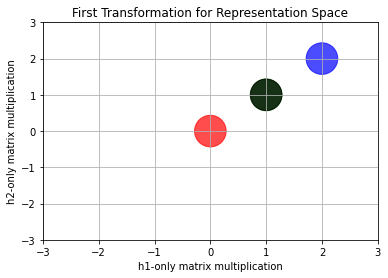

In [126]:
#plotting result
my_plot(matrix_product.numpy()[:,0],matrix_product.numpy()[:,1],
        my_x_lim,my_y_lim,"First Transformation for Representation Space","h1-only matrix multiplication", "h2-only matrix multiplication")

In [127]:
# to addition properly, transpose c and create a 4x2 matrix repeating the rows

sum = tf.math.add(tf.broadcast_to(tf.transpose(c),[4,2]),matrix_product)
sum.numpy()

array([[ 0, -1],
       [ 1,  0],
       [ 1,  0],
       [ 2,  1]], dtype=int32)

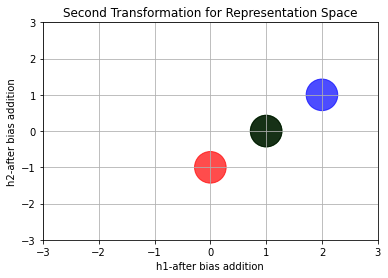

In [128]:
#plotting result
my_plot(sum.numpy()[:,0],sum.numpy()[:,1],
        my_x_lim,my_y_lim,"Second Transformation for Representation Space","h1-after bias addition","h2-after bias addition")

In [129]:
# apply the nonlinearity
max_output = tf.math.maximum(sum,0)
max_output.numpy()

array([[0, 0],
       [1, 0],
       [1, 0],
       [2, 1]], dtype=int32)

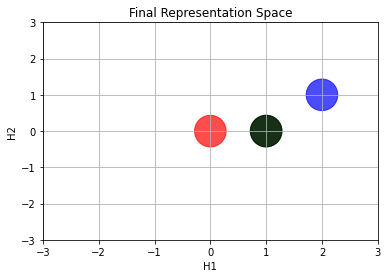

In [130]:
# plotting result
my_plot(max_output.numpy()[:,0],max_output.numpy()[:,1],
        my_x_lim,my_y_lim,"Final Representation Space","H1","H2")

In [131]:
# apply the linear transformation in output space
f = tf.linalg.matmul(max_output, w)

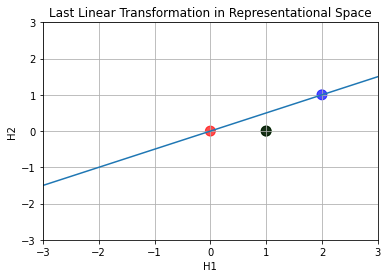

In [132]:
# what happened?

# plotting result
my_plot(max_output.numpy()[:,0],max_output.numpy()[:,1],
        my_x_lim,my_y_lim,"Last Linear Transformation in Representational Space","H1","H2", line_flag = True, line_m = 0.5,line_b=0,size=100)

## Using training (fit method)

The codes written was based in this page's example: 
https://www.tensorflow.org/tutorials/quickstart/beginner


In [ ]:
# definition of the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2,activation='relu', 
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1)),
                                    tf.keras.layers.Dense(1,activation='linear',
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,stddev=1,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1))
])

In [ ]:
# prediction without training
prediction_without_training = model(X).numpy()
prediction_without_training

array([[0.01346705],
       [1.6501632 ],
       [1.6292403 ],
       [3.2784336 ]], dtype=float32)

In [ ]:
# definition of loss function (and one example)
loss_fn = tf.keras.losses.MeanSquaredError()
loss_fn(y,prediction_without_training).numpy()

2.891741

In [ ]:
# configure model for training
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.MeanAbsoluteError()])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (4, 2)                    6         
_________________________________________________________________
dense_13 (Dense)             (4, 1)                    3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's try to save model parameters

checkpoint_path = "train_checkpoint/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 verbose=1,
                                                 monitor='mean_absolute_error')

In [ ]:
# adjust parameters to minimize the loss
model.fit(x=X,y=y,epochs=2500, callbacks=[cp_callback])

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 367ms/step - loss: 0.0325 - mean_absolute_error: 0.1716
Epoch 1446/2500
1/1 [==============================] - ETA: 0s - loss: 0.0324 - mean_absolute_error: 0.1714
Epoch 01446: mean_absolute_error improved from 0.17158 to 0.17144, saving model to train_checkpoint/cp.ckpt
INFO:tensorflow:Assets written to: train_checkpoint/cp.ckpt/assets
1/1 [==============================] - 0s 379ms/step - loss: 0.0324 - mean_absolute_error: 0.1714
Epoch 1447/2500
1/1 [==============================] - ETA: 0s - loss: 0.0323 - mean_absolute_error: 0.1713
Epoch 01447: mean_absolute_error improved from 0.17144 to 0.17129, saving model to train_checkpoint/cp.ckpt
INFO:tensorflow:Assets written to: train_checkpoint/cp.ckpt/assets
1/1 [==============================] - 0s 358ms/step - loss: 0.0323 - mean_absolute_error: 0.1713
Epoch 1448/2500
1/1 [==============================] - ETA: 0s - loss: 0.0323 - m

In [ ]:
# test again
prediction_after_training = model(X).numpy()
prediction_after_training

array([[0.06183673],
       [0.9681408 ],
       [0.96812123],
       [0.0210596 ]], dtype=float32)

In [ ]:
np.round(prediction_after_training)

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
# Let's check out the model weights.
# Notice the matrix from the first layer is approximately [[1,1],[1,1]], and
# its bias vector is near [0, -1]. The next layer's weight vector is approx. [1, -2] 
# and its bias value is near 0.

model.trainable_weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.93463033, 1.1713189 ],
        [0.9346505 , 1.1713217 ]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-4.9795304e-05, -1.1714606e+00], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.9697233],
        [-1.5825185]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([0.06183673], dtype=float32)>]

In [ ]:
model.trainable_weights[2].numpy()[1] / -model.trainable_weights[2].numpy()[1] 

array([-1.], dtype=float32)

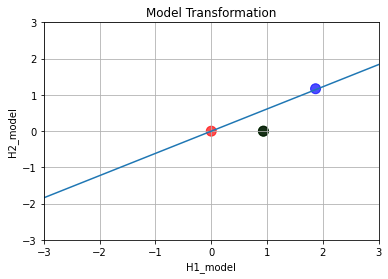

In [ ]:
# Now let's see the Representational Space found and the last transformation:
matmul_result = tf.linalg.matmul(tf.constant(X,dtype='float32'), model.trainable_variables[0].numpy())
bias_added = tf.math.add(tf.broadcast_to(model.trainable_weights[1].numpy(),[4,2]),matmul_result)
max_out = tf.math.maximum(bias_added,0)
estimatef =tf.math.add(tf.broadcast_to(model.trainable_weights[3].numpy(),[4,1]), 
                       tf.linalg.matmul(max_out, model.trainable_weights[2].numpy()) )
estimatef

model_m = model.trainable_weights[2].numpy()[0] / -model.trainable_weights[2].numpy()[1] 
model_b = 0 # by definition

# plotting result
my_plot(max_out.numpy()[:,0],max_out.numpy()[:,1],
        my_x_lim,my_y_lim,"Model Transformation","H1_model","H2_model", line_flag = True, line_m = model_m,line_b= model_b,size=100)

## Manual BackProp to see The net working

In [247]:
X_t = tf.constant(X,dtype=tf.float32)
y_t = tf.constant(y,dtype=tf.float32)

In [248]:
# definition of the new model
new_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2,activation='relu', 
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1)),
                                    tf.keras.layers.Dense(1,activation='linear',
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,stddev=1,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1))
])

In [249]:

# Let's use the same loss function (loss_fn)
# definition of loss function (and one example)
new_loss_fn = tf.keras.losses.MeanSquaredError()

# Let's define the optimizer

my_optimizer = tf.keras.optimizers.SGD()

In [250]:
# Now we define some objects

loss_history = []
first_layer_kernel_history = []
first_layer_bias_history = []
second_layer_weight_vector_history = []
second_layer_bias_history = []


In [251]:
def train_step(X_train,y_train):
  with tf.GradientTape() as tape:
    prediction = new_model(X_train)
    
    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(prediction.shape, (4, 1))
    
    loss_value = new_loss_fn(prediction, y_train)

  # Let's record
  loss_history.append(loss_value.numpy())
  first_layer_kernel_history.append(new_model.get_weights()[0].tolist())
  first_layer_bias_history.append(new_model.get_weights()[1].tolist())
  second_layer_weight_vector_history.append(new_model.get_weights()[2].tolist())
  second_layer_bias_history.append(new_model.get_weights()[3].tolist())

  grads = tape.gradient(loss_value, new_model.trainable_variables)
  my_optimizer.apply_gradients(zip(grads, new_model.trainable_variables))
  return loss_value

In [252]:
def train(epochs):
  for epoch in range(epochs):
    loss = train_step(X_t,y_t)
    print ('Epoch {} finished with {} error value'.format(epoch,loss))


In [253]:
train(2500)

Epoch 0 finished with 2.8917410373687744 error value
Epoch 1 finished with 2.3819479942321777 error value
Epoch 2 finished with 2.003758430480957 error value
Epoch 3 finished with 1.7166179418563843 error value
Epoch 4 finished with 1.4945175647735596 error value
Epoch 5 finished with 1.3200167417526245 error value
Epoch 6 finished with 1.1810660362243652 error value
Epoch 7 finished with 1.0691311359405518 error value
Epoch 8 finished with 0.9780320525169373 error value
Epoch 9 finished with 0.9032135605812073 error value
Epoch 10 finished with 0.8412590026855469 error value
Epoch 11 finished with 0.7895707488059998 error value
Epoch 12 finished with 0.7461481094360352 error value
Epoch 13 finished with 0.7094322443008423 error value
Epoch 14 finished with 0.678196907043457 error value
Epoch 15 finished with 0.6514683961868286 error value
Epoch 16 finished with 0.6284670829772949 error value
Epoch 17 finished with 0.6085643172264099 error value
Epoch 18 finished with 0.591249585151672

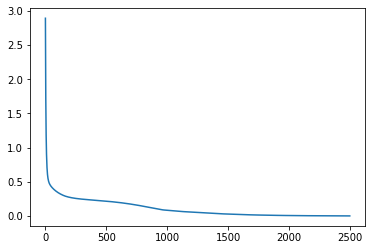

In [254]:
plt.plot(loss_history)

In [255]:
# primeiro iterador vai nas matrizes, segundo nas linhas, terceiro nas colunas
# O que queremos? Para todas as matrizes, seguir os elementos
matrix_element00 = np.array(first_layer_kernel_history)[:,0,0].tolist()
matrix_element01 = np.array(first_layer_kernel_history)[:,0,1].tolist()
matrix_element10 = np.array(first_layer_kernel_history)[:,1,0].tolist()
matrix_element11 = np.array(first_layer_kernel_history)[:,1,1].tolist()

# Seguir o vetor de bias

vetor_bias0 = np.array(first_layer_bias_history)[:,0]
vetor_bias1 = np.array(first_layer_bias_history)[:,1]

# Seguir o vetor kernel
vetor_kernel0 = np.array(second_layer_weight_vector_history)[:,0]
vetor_kernel1 = np.array(second_layer_weight_vector_history)[:,1]

# Seguir o bias da segunda camada
bias_2_camada = np.array(second_layer_bias_history)

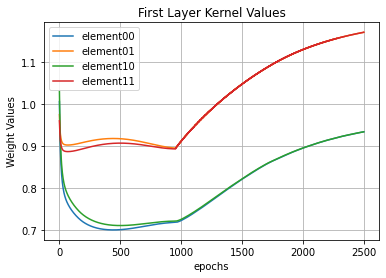

In [256]:
#plotting matrix values:

plt.plot(matrix_element00,label = "element00")
plt.plot(matrix_element01,label = "element01")
plt.plot(matrix_element10,label = "element10")
plt.plot(matrix_element11,label = "element11")
plt.xlabel("epochs")
plt.ylabel("Weight Values")
plt.title("First Layer Kernel Values")
plt.legend()
plt.grid()
plt.show()

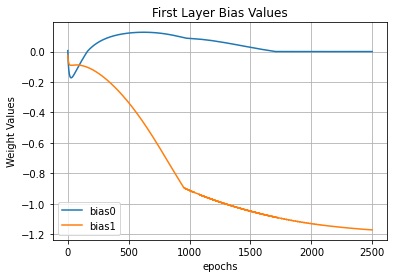

In [257]:
#plotting first layer bias values

plt.plot(vetor_bias0, label = "bias0")
plt.plot(vetor_bias1, label = "bias1")
plt.xlabel("epochs")
plt.ylabel("Weight Values")
plt.title("First Layer Bias Values")
plt.legend()
plt.grid()
plt.show()

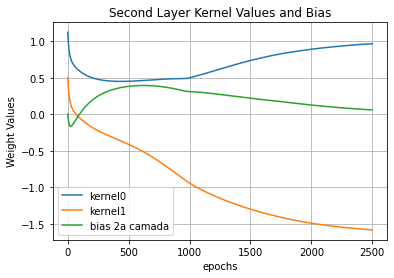

In [258]:
# plotting second layer kernel


plt.plot(vetor_kernel0, label = "kernel0")
plt.plot(vetor_kernel1, label = "kernel1")
plt.plot(bias_2_camada, label = "bias 2a camada")
plt.xlabel("epochs")
plt.ylabel("Weight Values")
plt.title("Second Layer Kernel Values and Bias")
plt.legend()
plt.grid()
plt.show()

## REFERENCES: 

_About plotting_

[How to put color in scatter plot](https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib)

[How to set points' sizes and transparency](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)

[How to draw a line in scatter plot](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)

[Plotting several lines](https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php)

_About Neural Networks and their topology behaviour_


[Manifold Topology](https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)

_How to keep track of weight values_

[Using tensorflow checkpoint](https://www.tensorflow.org/guide/checkpoint)

[TensorFlow Model Checkpoints - DOC](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)

[How to use checkpoints](https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6)

[Using model.save_weights](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save_weights)

_Initializing weights values_

[Random Normal](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomNormal)

_It looks like I'll need to implement my own backprop_

[Intro to AutoDiff](https://www.tensorflow.org/guide/autodiff)

[Training a model](https://www.tensorflow.org/guide/eager#train_a_model)